### NOTE: In the following demos of the linear regression, I have not divided dataset into train and test set. However, you could do so if you like

## Importing Libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression Implementation

In [125]:
class linear_regression:

    # private functions to only train Model
    def __hypothesis(self, x):
        return np.dot(x, self.theta)

    def __cost(self):
        J = (0.5/self.m) * (np.sum((self.__hypothesis(self.X) - self.Y)**2))
        return J

    def __derivative(self):
        d_j = (1/self.m)*(np.sum(self.__hypothesis(self.X)-self.Y))
        return d_j

    def __gradient_descent(self):
        learning_rate = 0.001
        itertaions = 500
        costs = []
        for _ in range(itertaions):
            gradient = self.__derivative()
            self.theta = self.theta - (learning_rate*gradient)
            costs.append(self.__cost())

        return costs

    # public functions to call
    def fit(self, X, Y):
        self.Y = Y 
        self.X = np.hstack((np.ones((len(X), 1)), X))
        self.m, self.n = self.X.shape
        self.theta = np.zeros((self.n, 1))
        self.iter_vs_rmse = self.__gradient_descent()

    def predict(self, x):
        x_tmp = np.hstack((np.ones((len(x), 1)), x))
        return self.__hypothesis(x_tmp)

    def score(self, x, y):
        y_pred = self.predict(x)
        rmse = np.sqrt((1 / x.shape[0]) * (np.sum((y_pred-y)**2)))
        return rmse

    def plot_iterations_vs_rmse(self):
        plt.figure()
        plt.title('Iterations vs RMSE')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.plot(self.iter_vs_rmse)
        plt.show()


## Demo of linear regression on 'simple_data' Dataset (1 Feature)

### Loading the dataset and Visualising it

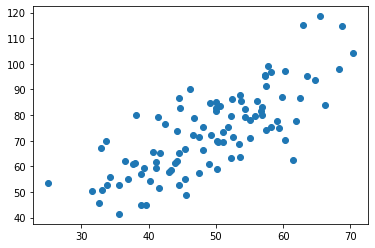

In [126]:
df1 = pd.read_csv('Datasets/simple_data.csv')
df1 = df1.to_numpy()

# Splitting the dataset via Numpy 
X1 = df1[:, 0]
Y1 = df1[:, 1]
X1 = np.reshape(X1, (len(X1), 1))
Y1 = np.reshape(Y1, (len(Y1), 1))

plt.scatter(X1,Y1)
plt.show()


### Applying Linear Regression on the Dataset

The score(RMSE) of the Model is : 10.49756


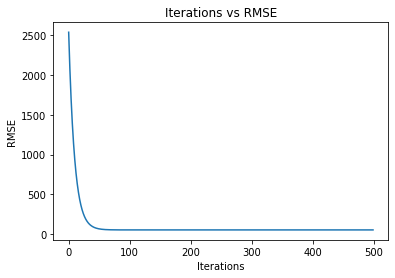

In [127]:
lr1 = linear_regression()
lr1.fit(X1, Y1)
print('The score(RMSE) of the Model is : {0:.7}'.format(lr1.score(X1, Y1)) )
lr1.plot_iterations_vs_rmse()

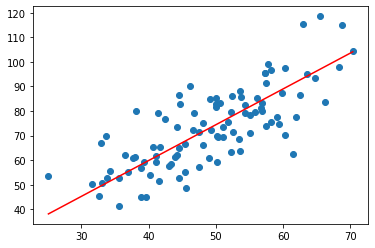

In [128]:
y_pred1 = lr1.predict(X1)
plt.scatter(X1, Y1)
plt.plot([min(X1), max(X1)], [min(y_pred1), max(y_pred1)], color='red')  # regression line
plt.show()

# Demo of linear regression on 'Abalone' Dataset (Multi-Feature)

### Loading and visualising the Dataset

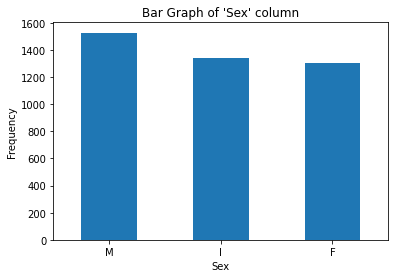

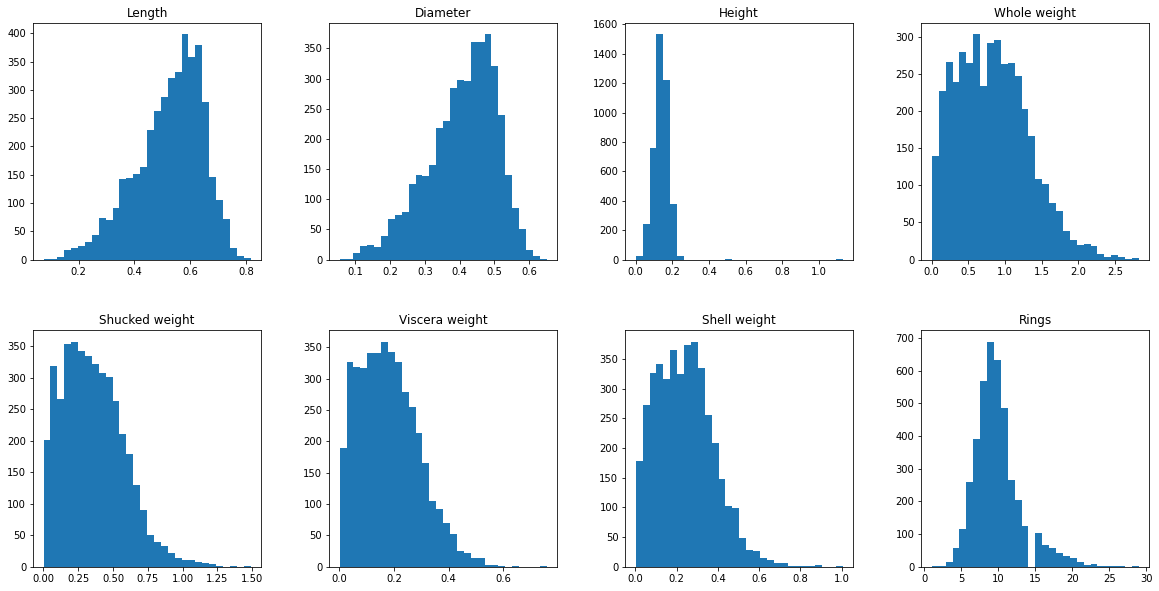

In [129]:
df2 = pd.read_csv('Datasets/abalone.csv')
df2['Sex'].value_counts().plot.bar(xlabel='Sex', ylabel='Frequency',title="Bar Graph of 'Sex' column", rot=0)
df2.hist(figsize=(20, 10), grid=False, layout=(2, 4), bins=30)
plt.show()


### Recoding the values of 'sex' column as (M, I, F) -> (1, 2, 3)

In [130]:
df2["Sex"].replace({"M": 1, "I": 2, 'F': 3}, inplace=True)


### Splitting the dataset

In [131]:
df2 = df2.to_numpy()
X2 = df2[:, :8]
Y2 = df2[:, -1]
Y2 = np.reshape(Y2, (len(Y2), 1))

### Applying Linear Regression on the Dataset

The score(RMSE) of the Model is : 3.062166


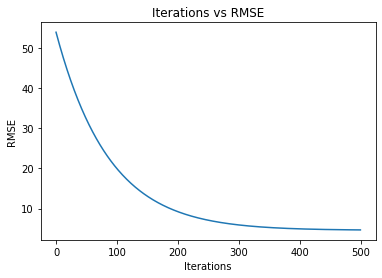

In [132]:
lr2 = linear_regression()
lr2.fit(X2, Y2)
print('The score(RMSE) of the Model is : {0:.7}'.format(lr2.score(X2, Y2)))
lr2.plot_iterations_vs_rmse()